In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
TA = 100
TB = 200
n = 100
t = 0.02
S = 1000
k = 0.5
A = 1


dx = t/n
x = np.linspace(0,t,n)
Su = S*dx*A

In [59]:
K = np.zeros((n,n))
coef1 = (3*k*A)/dx
coef2 = -(k*A)/dx
coef3 = (2*k*A)/dx

In [66]:
K[0, 0] = coef1
K[-1, -1] = coef1
K[1:-1, 1:-1][np.diag_indices_from(K[1:-1, 1:-1])] =  coef3
K[1:, :-1][np.diag_indices_from(K[1:, :-1])] = coef2
K[:-1, 1:][np.diag_indices_from(K[:-1, 1:])] = coef2

Q = np.zeros(n) + Su
Q[0] += coef3*TA
Q[-1] += coef3*TB

T = np.linalg.solve(K,Q)

In [67]:
# exact sol
def analytical_T(TA,TB,S,k,t,linspace):
    return ((TA-TB)/t+(S/(2*k))*(t-x))*x+TA

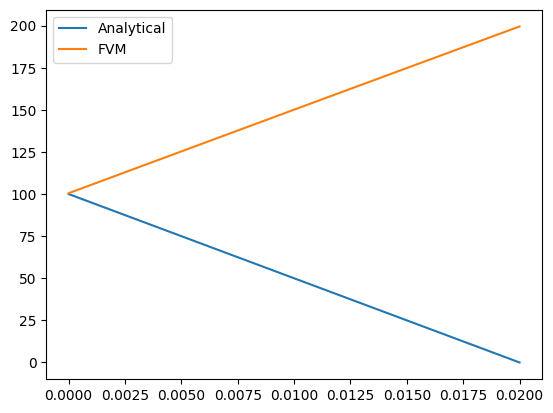

In [68]:
plt.plot(x, analytical_T(TA,TB,Su,k,t,x), label="Analytical")
plt.plot(x, T, label="FVM")
plt.legend()
plt.show()